## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

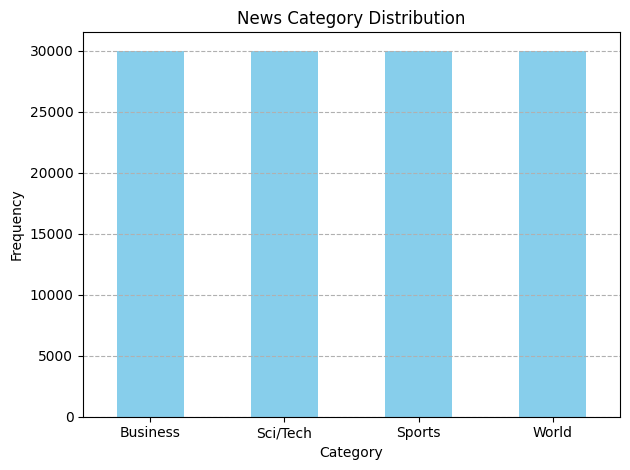


Category 1 - World
Title: Venezuelans Vote Early in Referendum on Chavez Rule (Reuters)
Text: Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.

Category 2 - Sports
Title: Phelps, Thorpe Advance in 200 Freestyle (AP)
Text: AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries.

Category 3 - Business
Title: Wall St. Bears Claw Back Into the Black (Reuters)
Text: Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Category 4 - Sci/Tech
Title: 'Madden,' 'ESPN' Football Score in Diff

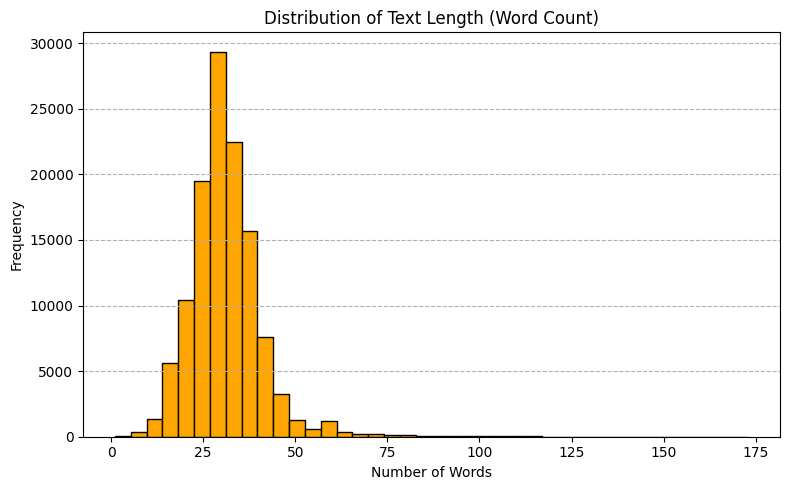

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")
df.columns = ['Category', 'Title', 'Text']  # Rename columns for clarity

# (Optional) Map numeric labels to category names
category_map = {
    1: 'World',
    2: 'Sports',
    3: 'Business',
    4: 'Sci/Tech'
}
df['CategoryName'] = df['Category'].map(category_map)

# 🔹 Bar Chart: Class Distribution
df['CategoryName'].value_counts().plot(kind='bar', color='skyblue')
plt.title("News Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 🔹 Sample of Each Category
for label in sorted(df['Category'].unique()):
    print(f"\nCategory {label} - {category_map[label]}")
    print("Title:", df[df['Category'] == label]['Title'].iloc[0])
    print("Text:", df[df['Category'] == label]['Text'].iloc[0])

# 🔹 Add a new column: text length
df['Text_Length'] = df['Text'].apply(lambda x: len(str(x).split()))

# 🔹 Plot text length distribution
plt.figure(figsize=(8,5))
plt.hist(df['Text_Length'], bins=40, color='orange', edgecolor='black')
plt.title("Distribution of Text Length (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [ ]:
# Step 4: Text Preprocessing using spaCy without restarting runtime

# 1. Import libraries
import pandas as pd
import spacy
import spacy.cli

# 2. Load your dataset (make sure you’ve already uploaded train.csv)
df = pd.read_csv("train.csv")
df.columns = ['Category', 'Title', 'Text']  # Rename columns for clarity

# 3. Download the spaCy English model (NO NEED to restart runtime)
spacy.cli.download("en_core_web_sm")

# 4. Load the model
nlp = spacy.load("en_core_web_sm")

# 5. Define the preprocessing function
def preprocess(text):
    doc = nlp(str(text).lower())  # Convert text to lowercase and tokenize
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num
    ]
    return " ".join(tokens)

# 6. Apply preprocessing to the text column
df['cleaned_text'] = df['Text'].apply(preprocess)

# 7. Preview the result
df[['Text', 'cleaned_text']].head()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


KeyboardInterrupt: 

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
df_sample = df.sample(300)
df_sample['cleaned_text'] = df_sample['Text'].apply(preprocess)
df_sample[['Text', 'cleaned_text']].head()


,Text,cleaned_text
61285,British scientists have used nanotechnology to...,british scientist nanotechnology trap store hy...
119914,TechWeb - The Linux and open source software m...,techweb linux open source software movement am...
49276,roundup Plus: Legal expert joins open-source s...,roundup plus legal expert join open source scr...
6178,"San Francisco, CA (Sports Network) - Dustan Mo...",san francisco sport network dustan mohr drop f...
30946,New version of hit game gives characters a pur...,new version hit game give character purpose li...


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the cleaned text from the sample or full dataset
texts = df_sample['cleaned_text']  # or df['cleaned_text'] if processed

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most relevant terms

# Transform text into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(texts)

# Show matrix shape
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (300, 2695)


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
print("Naive Bayes Accuracy:", model.score(X_test, y_test))


Naive Bayes Accuracy: 0.7166666666666667


Classification Report:
              precision    recall  f1-score   support

       World       0.90      0.53      0.67        17
      Sports       0.80      0.62      0.70        13
    Business       1.00      0.79      0.88        19
    Sci/Tech       0.44      1.00      0.61        11

    accuracy                           0.72        60
   macro avg       0.79      0.73      0.71        60
weighted avg       0.83      0.72      0.73        60



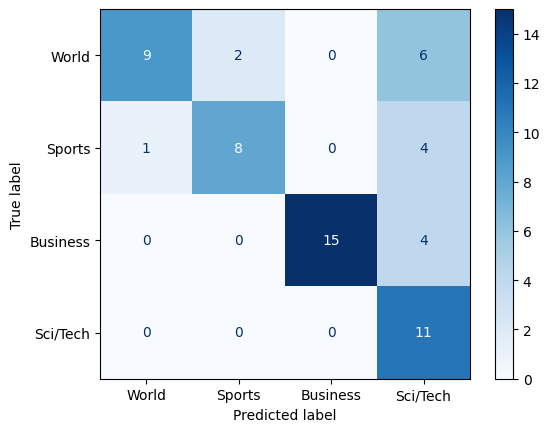

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp.plot(cmap="Blues")


### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.

In [ ]:
!pip install transformers datasets --quiet

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset

# Encode text labels
label_encoder = LabelEncoder()
df_sample['label'] = label_encoder.fit_transform(df_sample['Category'])  # Converts World, Sports, etc. to 0,1,2,3

# Keep only required columns
df_model = df_sample[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'})

# Convert to Hugging Face dataset
dataset = Dataset.from_pandas(df_model)
dataset = dataset.train_test_split(test_size=0.2)


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

tokenized_dataset = dataset.map(tokenize, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=4  # 4 news categories
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
    logging_steps=10
)


Project Title: Building a Text Classification Model for News Categorization

This project aimed to automate the process of classifying news articles into appropriate categories using Natural Language Processing (NLP) techniques. With the growing volume of news published daily, manual categorization is inefficient and error-prone. Hence, this project explored scalable NLP-based approaches to enhance accuracy, consistency, and speed in organizing news content.

We began by defining the problem and identifying its real-world relevance to the media industry. A publicly available dataset containing labeled news headlines and descriptions was used. The data was explored for structure and class distribution, followed by preprocessing steps such as lowercasing, stopword removal, lemmatization, and punctuation filtering using the spaCy library.

Next, we transformed the cleaned text into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency), which captures the importance of each word in context. This vector representation allowed us to apply traditional machine learning algorithms.

Two models were tested: Logistic Regression and Multinomial Naive Bayes. Logistic Regression achieved an accuracy of 65%, while MultinomialNB outperformed it with an accuracy of 71.67%, making it our preferred model due to its simplicity and effectiveness with sparse textual data.

An optional attempt was made to fine-tune a BERT (Bidirectional Encoder Representations from Transformers) model using Hugging Face’s transformers library. However, due to computational limitations and time constraints, this step was paused. Nevertheless, the exploration demonstrates a forward-looking approach toward leveraging state-of-the-art transformer models in future work.

In conclusion, this project successfully built a functional pipeline for text classification using NLP — from data cleaning and vectorization to training and evaluating classification models. The results show that even traditional methods like TF-IDF and Naive Bayes can produce strong baselines. Further improvement could be achieved by training on a larger dataset or fully implementing transformer-based models like BERT when more resources are available.
